# Diagnóstico de la Regresión Lineal

### Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Creación de dataset

In [2]:
def load_boston():
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    return {'data': data, 'target': target, 'DESCR': 'boston dataset', 'feature_names': ['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']}

### Cargar dataset "Boston" con SKLEARN

In [3]:
data = load_boston()

In [4]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
# Mostrar las claves del diccionario
data.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

In [6]:
# Mostrar la descripción de los datos.
print(data['DESCR'])

boston dataset


In [7]:
# Las variables explicativas.
X = data['data']
header = data['feature_names']

In [8]:
# La variable respuesta.
y = data['target']
y = y.reshape(-1, 1)

#### Convierte los datos en un DataFrame y luego explora:

In [9]:
df = pd.DataFrame(np.append(X,y,axis = 1))
df.columns = list(header)+['PRICE']

In [10]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
# Estadística descriptiva de las columnas.
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
# Matriz de correlación por pares.
np.round(df.corr(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


# Matriz de Correlación por Pares

La **matriz de correlación por pares** es una matriz que muestra los coeficientes de correlación entre todas las posibles combinaciones de un conjunto de variables. Cada celda en la matriz representa la correlación entre dos variables diferentes. La correlación mide la relación lineal entre dos variables, con valores que van desde -1 hasta 1:

- **1** indica una correlación positiva perfecta, donde las variables aumentan o disminuyen juntas.
- **0** indica que no hay correlación lineal entre las variables.
- **-1** indica una correlación negativa perfecta, donde una variable aumenta mientras la otra disminuye.

## Contexto y Uso

En análisis de datos, la matriz de correlación es útil para identificar relaciones entre variables. Es comúnmente utilizada en estadística, ciencia de datos y aprendizaje automático para:

- Detectar multicolinealidad.
- Identificar relaciones lineales entre variables.
- Seleccionar características en modelos predictivos.

## Ejemplo en Python con Pandas

Aquí hay un ejemplo de cómo calcular una matriz de correlación por pares usando `pandas` en Python:

```python
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'Variable1': [1, 2, 3, 4, 5],
    'Variable2': [10, 20, 30, 40, 50],
    'Variable3': [5, 4, 3, 2, 1]
}

df = pd.DataFrame(data)

# Calcular la matriz de correlación
correlation_matrix = df.corr()

print(correlation_matrix)


## Salida Esperada

La salida es una matriz simétrica donde cada elemento representa la correlación entre un par de variables:



            Variable1  Variable2  Variable3
Variable1        1.0        1.0       -1.0
Variable2        1.0        1.0       -1.0
Variable3       -1.0       -1.0        1.0



En este ejemplo:

- `Variable1` y `Variable2` tienen una correlación perfecta positiva (1.0).
- `Variable1` y `Variable3`, así como `Variable2` y `Variable3`, tienen una correlación perfecta negativa (-1.0).

## Tipos de Correlación

Pandas utiliza por defecto la **correlación de Pearson**, que mide la relación lineal. También se pueden calcular otros tipos de correlación como:

- **Spearman**: Para relaciones monótonas.
- **Kendall**: Para evaluar la concordancia entre variables.

Puedes especificar el método al calcular la matriz de correlación:

```python
correlation_matrix = df.corr(method='spearman')


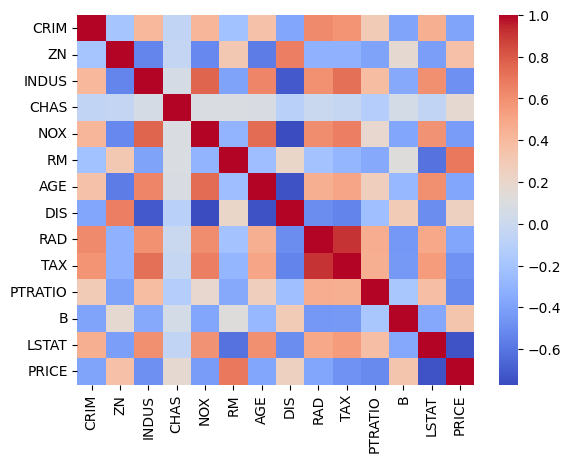

In [14]:
# Visualice la matriz de correlación.
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

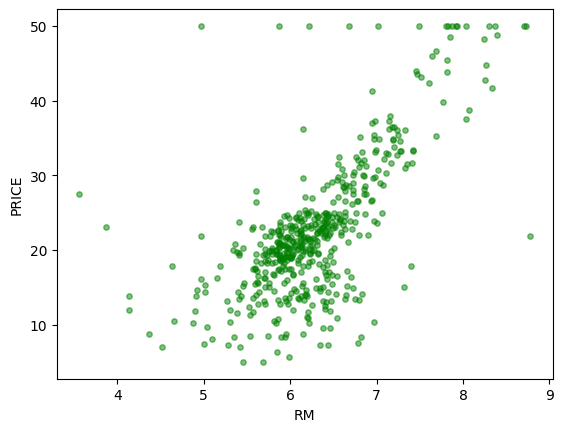

In [16]:
# Visualizar RM vs PRICE.
plt.scatter(X[:,5],y[:,0],c = 'g',s=15,alpha=0.5)
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.show()

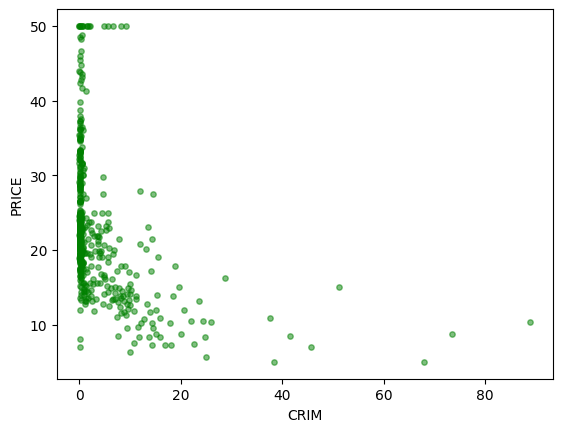

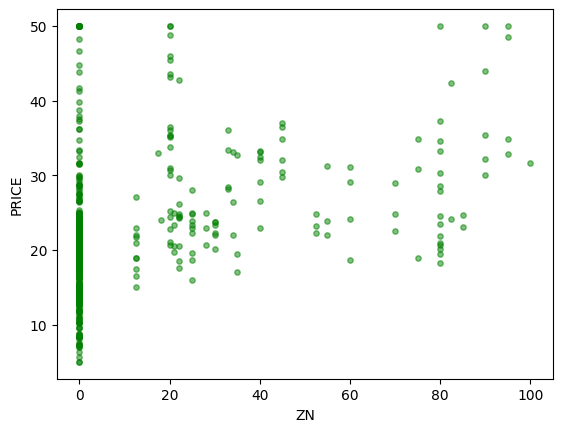

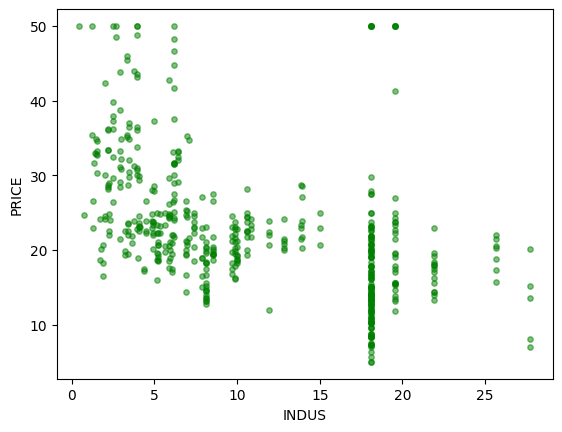

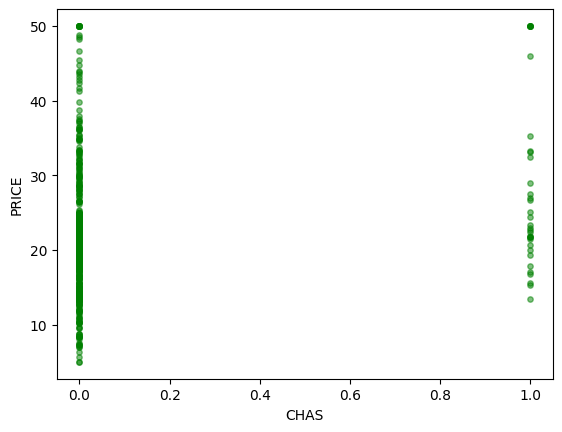

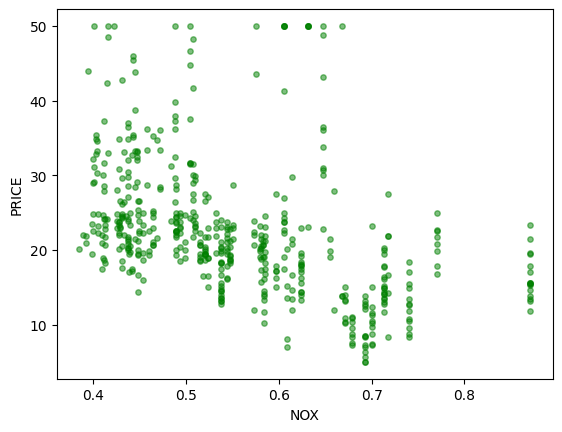

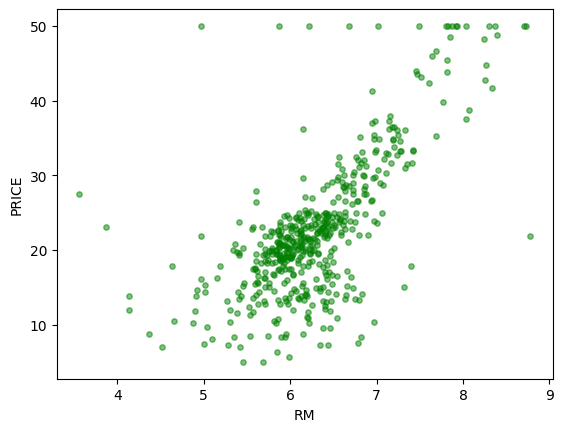

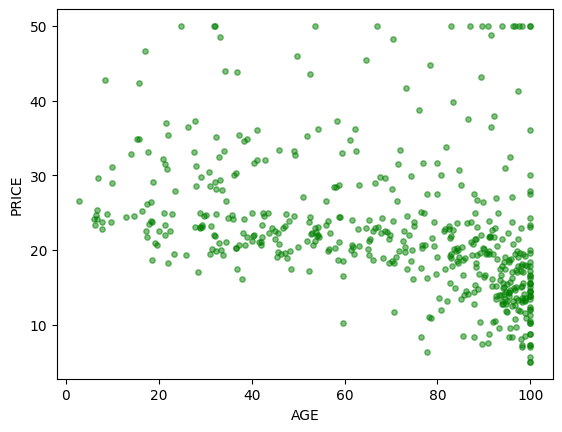

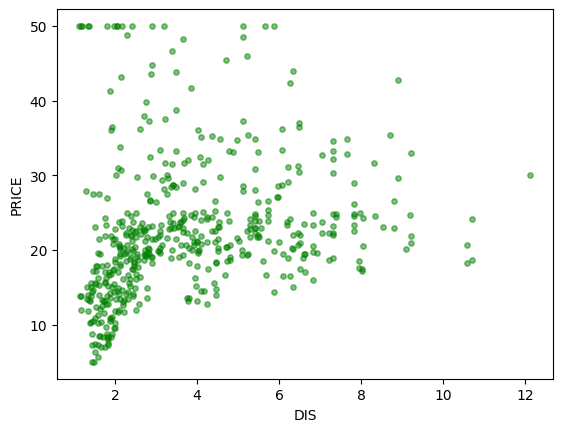

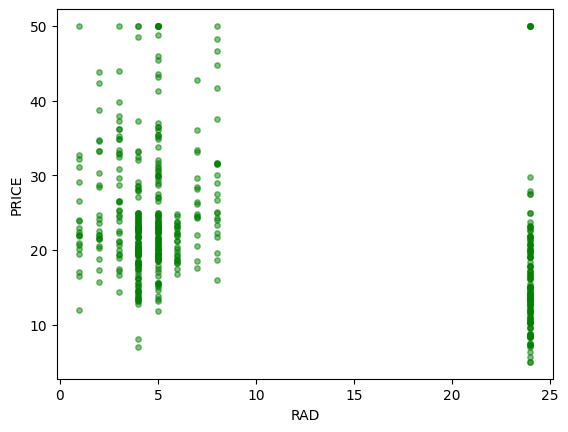

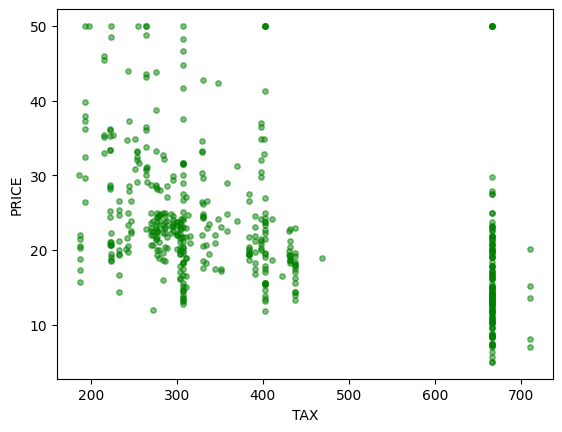

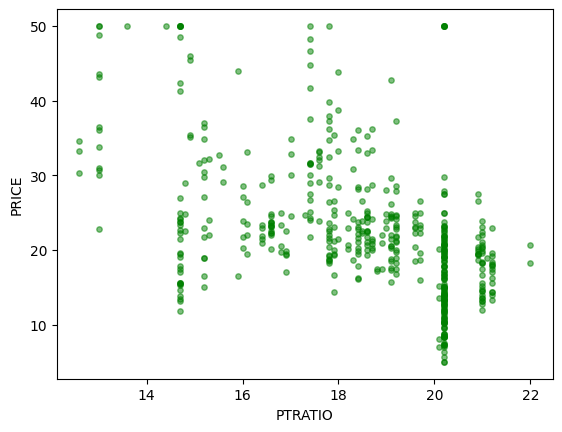

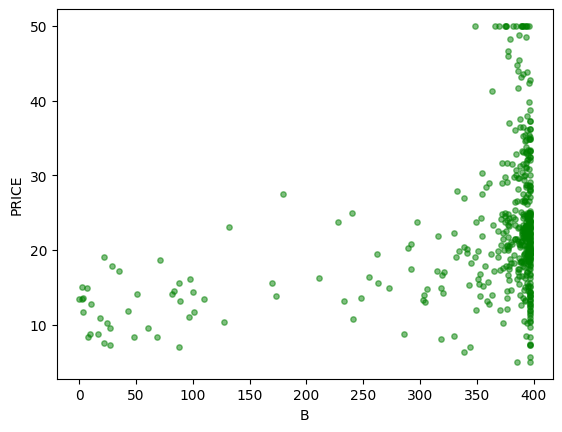

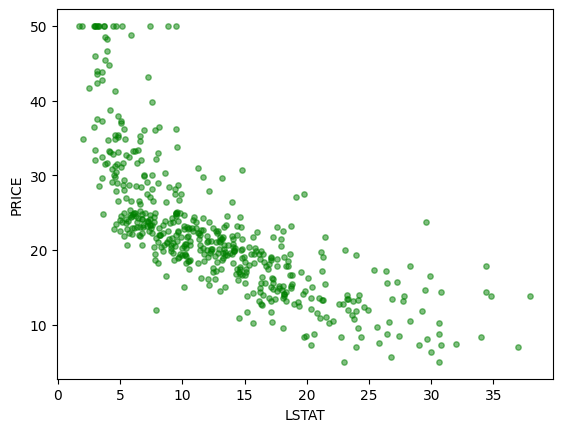

In [17]:
# ciclo for para visualización de scatter plot de todas las variables con price
for i in range(13):
    plt.scatter(X[:,i],y[:,0],c = 'g',s=15,alpha=0.5)
    plt.xlabel(header[i])
    plt.ylabel('PRICE')
    plt.show()


### Entrenar regresión lineal

In [19]:
# Instancia
lm = LinearRegression(fit_intercept=True)

# Ajuste del modelo
lm.fit(X,y)

LinearRegression()

In [20]:
# Intercepto
lm.intercept_

array([36.45948839])

In [21]:
# El resto de coeficientes (parámetros).
lm.coef_

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [22]:
# Mostrar los parámetros como un DataFrame.
parametersDF = pd.DataFrame(lm.coef_,index=['Parameter Value'],columns=header)
parametersDF['Intercept'] = lm.intercept_[0]
parametersDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Intercept
Parameter Value,-0.108011,0.04642,0.020559,2.686734,-17.766611,3.809865,0.000692,-1.475567,0.306049,-0.012335,-0.952747,0.009312,-0.524758,36.459488


### Diagnóstico

In [23]:
# Predicción dentro de la muestra.
predY = lm.predict(X)

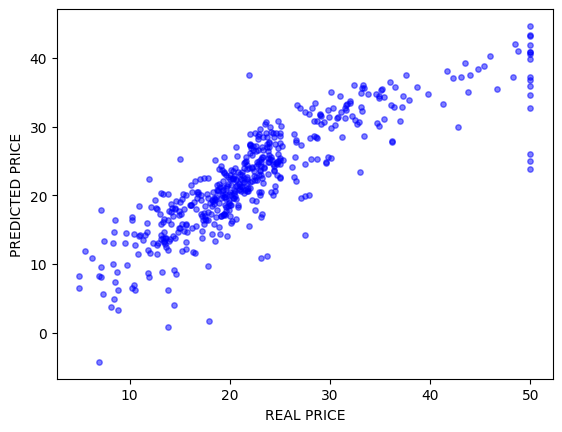

In [24]:
# Mostrar Y real vs Y previsto.
plt.scatter(y,predY,c = 'blue', s=15, alpha=0.5)
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show()

In [26]:
# Calcular la correlación entre la Y real y la Y prevista.
pd.Series(y[:,0]).corr(pd.Series(predY[:,0]))

0.8606059865637758

In [27]:
# Coeficiente de determinación (R^2):
lm.score(X,y)

0.7406426641094095

### Pruebas dentro y fuera de la muestra:

In [28]:
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


In [29]:
# predY_in = predicción de Y dentro de la muestra.
# predY_out = predicción de Y fuera de la muestra.

# Nueva instancia
lm = LinearRegression()

# Nuevo ajuste
lm.fit(X_train,Y_train)

# Predicción para la muestra (train)
Y_pred_train = lm.predict(X_train)

# Predicción para fuera de la muestra (test)
Y_pred_test = lm.predict(X_test)

In [30]:
print('MSE dentro de la muestra es      : ' + str(metrics.mean_squared_error(Y_train, Y_pred_train)))
print('MSE fuera de la muestra es       : ' + str(metrics.mean_squared_error(Y_test, Y_pred_test)))
print('-'*50)
print('RMSE dentro de la muestra es     : ' + str(np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train))))
print('RMSE fuera de la muestra es      : ' + str(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test))))


MSE dentro de la muestra es      : 20.184336639873152
MSE fuera de la muestra es       : 28.40585481050824
--------------------------------------------------
RMSE dentro de la muestra es     : 4.492698146979513
RMSE fuera de la muestra es      : 5.329714327288869


In [31]:
# MAPE dentro de la muestra y fuera de muestra
print('MAPE dentro de la muestra es     : ' + str(np.mean(np.abs((Y_train - Y_pred_train) / Y_train)) * 100))
print('MAPE fuera de la muestra es      : ' + str(np.mean(np.abs((Y_test - Y_pred_test) / Y_test)) * 100))

MAPE dentro de la muestra es     : 15.746389964353755
MAPE fuera de la muestra es      : 19.699996167173158


### Explicación:

Este fragmento de código evalúa el rendimiento de un modelo de aprendizaje automático comparando los valores predichos con los valores reales, tanto para el conjunto de datos de entrenamiento (dentro de la muestra) como para el conjunto de datos de prueba (fuera de la muestra).

1. **Error Cuadrático Medio (MSE)**:
   - **Dentro de la muestra (In-sample MSE)**: Se calcula utilizando los datos de entrenamiento (`Y_train`) y las predicciones correspondientes (`Y_pred_train`). Esto mide el error promedio de las predicciones dentro del conjunto de entrenamiento.
   - **Fuera de la muestra (Out-of-sample MSE)**: Se calcula utilizando los datos de prueba (`Y_test`) y las predicciones correspondientes (`Y_pred_test`). Esto mide el error promedio de las predicciones en el conjunto de prueba, evaluando la capacidad del modelo para generalizar a datos nuevos.

2. **Raíz del Error Cuadrático Medio (RMSE)**:
   - **Dentro de la muestra (In-sample RMSE)**: Es la raíz cuadrada del MSE dentro de la muestra. Proporciona una medida del error en las mismas unidades que la variable objetivo, lo que puede ser más interpretable que el MSE.
   - **Fuera de la muestra (Out-of-sample RMSE)**: Es la raíz cuadrada del MSE fuera de la muestra, proporcionando una medida similar para el conjunto de prueba.

### Contexto
Cuando entrenas un modelo de aprendizaje automático, se suelen utilizar dos conjuntos de datos:
- **Conjunto de entrenamiento**: Utilizado para ajustar el modelo.
- **Conjunto de prueba**: Utilizado para evaluar qué tan bien el modelo generaliza a datos nuevos.

### Valores Proporcionados
1. **In-sample MSE (Error Cuadrático Medio dentro de la muestra)**:
   - **Valor**: 20.184336639873152
   - **Interpretación**: Este valor indica el error promedio que comete el modelo al predecir los datos dentro del conjunto de entrenamiento. Un valor más bajo significa que el modelo ajusta bien los datos de entrenamiento.

2. **Out-of-sample MSE (Error Cuadrático Medio fuera de la muestra)**:
   - **Valor**: 28.40585481050845
   - **Interpretación**: Este valor muestra el error promedio del modelo al predecir los datos en el conjunto de prueba. Este valor es generalmente más alto que el MSE dentro de la muestra porque el modelo está prediciendo sobre datos que no ha visto antes. Si este valor es significativamente mayor que el MSE dentro de la muestra, puede indicar que el modelo podría estar sobreajustado (overfitted).

3. **In-sample RMSE (Raíz del Error Cuadrático Medio dentro de la muestra)**:
   - **Valor**: 4.492698146979513
   - **Interpretación**: Es la raíz cuadrada del MSE dentro de la muestra. Proporciona el error en las mismas unidades que la variable objetivo, lo que puede ser más fácil de interpretar. Un valor más bajo significa que el modelo es más preciso con los datos de entrenamiento.

4. **Out-of-sample RMSE (Raíz del Error Cuadrático Medio fuera de la muestra)**:
   - **Valor**: 5.3297143272888885
   - **Interpretación**: Es la raíz cuadrada del MSE fuera de la muestra. Este valor también está en las mismas unidades que la variable objetivo y, al ser mayor que el RMSE dentro de la muestra, sugiere que el modelo tiene más error al predecir sobre datos nuevos.

### Resumen General
- **MSE** y **RMSE** más bajos indican un mejor rendimiento del modelo.
- En este caso, los valores de error fuera de la muestra (tanto MSE como RMSE) son mayores que los valores dentro de la muestra, lo que es esperado. Sin embargo, la diferencia no es drástica, lo que sugiere que el modelo generaliza razonablemente bien.
- Si la diferencia fuera mayor, podríamos sospechar que el modelo está sobreajustado a los datos de entrenamiento.


### Análisis de Residuales en Regresión Lineal

El análisis de residuales es una parte fundamental de la evaluación de un modelo de regresión lineal (RL). Los **residuales** son las diferencias entre los valores observados y los valores predichos por el modelo. Al analizar los residuales, puedes obtener información sobre el ajuste del modelo y detectar posibles problemas que podrían afectar su interpretación y validez.

#### ¿Qué son los residuales?
Los residuales (o errores) se calculan como:

\[ \text{Residual} = Y_{\text{observado}} - Y_{\text{predicho}} \]

Donde:
- \( Y_{\text{observado}} \) es el valor real o observado de la variable dependiente.
- \( Y_{\text{predicho}} \) es el valor predicho por el modelo de regresión.

#### Objetivos del Análisis de Residuales
El análisis de residuales tiene varios objetivos:
1. **Verificar la linealidad**: Los residuales deben estar distribuidos de manera aleatoria alrededor de cero, lo que indica que la relación entre las variables independientes y dependientes es lineal.
2. **Evaluar la homocedasticidad**: Esto significa que la varianza de los residuales debe ser constante a lo largo de todos los niveles de la variable independiente. Si no es así (es decir, si hay heterocedasticidad), puede haber problemas con el modelo.
3. **Detectar normalidad**: Los residuales deben seguir una distribución normal. Si no lo hacen, podría afectar la validez de las pruebas estadísticas.
4. **Identificar puntos atípicos**: Los residuales muy grandes pueden indicar la presencia de outliers o puntos atípicos que podrían influir de manera desproporcionada en el modelo.
5. **Detección de autocorrelación**: En el contexto de series temporales o datos ordenados, se verifica si los residuales están correlacionados entre sí, lo que podría indicar que el modelo no ha capturado alguna estructura en los datos.

#### Métodos Comunes de Análisis de Residuales
1. **Gráfico de Residuales vs. Valores Ajustados**: Este gráfico muestra los residuales en el eje y y los valores predichos en el eje x. Deberías observar una dispersión aleatoria sin patrones claros.
   - **Patrón en forma de U o arco**: Indica que la relación entre las variables podría no ser lineal.
   - **Patrón en embudo**: Sugiere heterocedasticidad.

2. **Gráfico Q-Q (Quantile-Quantile)**: Este gráfico compara la distribución de los residuales con una distribución normal teórica. Si los residuales son normales, los puntos deberían alinearse en una línea recta.
   - **Desviaciones significativas de la línea**: Indican que los residuales no son normales.

3. **Histograma de los Residuales**: Un histograma te permite visualizar la distribución de los residuales. Debería aproximarse a una campana simétrica (distribución normal).
   - **Sesgo en un lado**: Puede indicar problemas de normalidad.

4. **Durbin-Watson**: Una prueba estadística utilizada para detectar la autocorrelación en los residuales de un modelo de regresión.

#### ¿Qué hacer si encuentras problemas?
- **Linealidad**: Si los residuales muestran un patrón no lineal, podrías considerar transformar las variables o usar un modelo no lineal.
- **Heterocedasticidad**: Si detectas heterocedasticidad, podrías probar transformar la variable dependiente, usar métodos robustos a la heterocedasticidad, o emplear un modelo de regresión ponderada.
- **Normalidad**: Si los residuales no son normales, podrías considerar transformaciones de las variables o utilizar métodos que no asuman normalidad, como la regresión cuantílica.
- **Outliers**: Identificar y analizar los outliers para decidir si se deben eliminar, o si debes ajustar el modelo para considerar su impacto.
- **Autocorrelación**: Si los residuales están autocorrelacionados, podrías necesitar un modelo más complejo, como una regresión con términos de autoregresión o modelos de series temporales.

In [32]:
# Calcular residual.
residual = Y_train - Y_pred_train

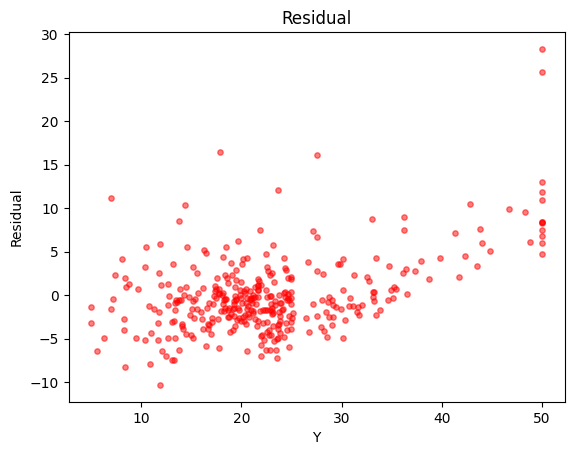

In [33]:
# Q: ¿Puedes comprobar "visualmente" que la media = 0 y la varianza = constante?
plt.scatter(Y_train,residual,c = 'red', s=15, alpha=0.5)
plt.xlabel('Y')
plt.ylabel('Residual')
plt.title('Residual')
plt.show()

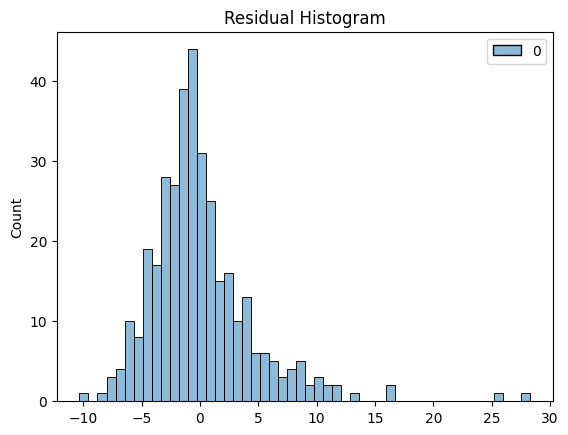

In [34]:
# Q: ¿Los residuos se distribuyen normalmente centrados alrededor de 0?
sns.histplot(residual, bins=50, color='green').set_title("Residual Histogram")
plt.show()

#### Dado un nuevo conjunto de valores para las variables explicativas, prediga la respuesta:
- CRIM : 0,03
- ZN : 0,0
- INDUS : 13,0
- CHAS : 0,0
- NOX : 0,4
- RM : 4,3
- AGE : 23,5
- DIS : 1,9
- RAD : 1,0
- TAX : 273,0
- PTRATIO : 18,0
- B : 380,0
- LSTAT : 7,5

In [35]:
X_new = np.array([0.03, 0.0, 13.0, 0.0, 0.4, 4.3, 23.5, 1.9, 1.0, 273.0, 18.0, 380.0, 7.5]).reshape(1,-1)  # Reshaped as a row.
Y_pred_new = lm.predict(X_new)
print(np.round(Y_pred_new[0,0],3))

20.594


In [36]:
# COn río
X_new = np.array([0.03, 0.0, 13.0, 1.0, 0.4, 4.3, 23.5, 1.9, 1.0, 273.0, 18.0, 380.0, 7.5]).reshape(1,-1)  # Reshaped as a row.
Y_pred_new = lm.predict(X_new)
print(np.round(Y_pred_new[0,0],3))

20.859


In [37]:
# con NOX al máximo
X_new = np.array([0.03, 0.0, 13.0, 0.0, 0.871, 4.3, 23.5, 1.9, 1.0, 273.0, 18.0, 380.0, 7.5]).reshape(1,-1)  # Reshaped as a row.
Y_pred_new = lm.predict(X_new)
print(np.round(Y_pred_new[0,0],3))

13.84


In [38]:
# RM al máximo
X_new = np.array([0.03, 0.0, 13.0, 0.0, 0.4, 8.78, 23.5, 1.9, 1.0, 273.0, 18.0, 380.0, 7.5]).reshape(1,-1)  # Reshaped as a row.
Y_pred_new = lm.predict(X_new)
print(np.round(Y_pred_new[0,0],3))

42.247


# Clasificación con regresión logística

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [57]:
# Cargar datos
data = load_breast_cancer()

In [41]:
# Mostrar la descripción.
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [58]:
# Explanatory variables.
X = data['data']
print(data['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [59]:
X.shape

(569, 30)

In [60]:
# Variable de respuesta.
# Vuelva a etiquetar de modo que 0 = 'benigno' y 1 = maligno.
Y = 1 - data['target']
label = list(data['target_names'])
label.reverse()
print(label)

['benign', 'malignant']


In [86]:
# Crear dataframe con X Y
df = pd.DataFrame(np.append(X,Y.reshape(-1,1),axis = 1))
df.columns = list(data['feature_names'])+['target']

In [87]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


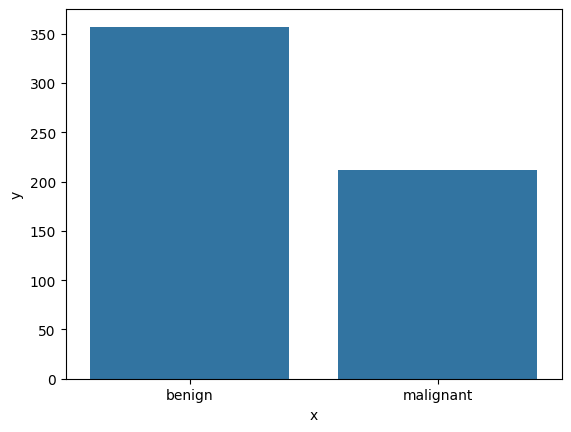

In [61]:
# Visualizar la frecuencia.
ser = pd.Series(Y)
table = ser.value_counts()
table = table.sort_index()         # Debe ordenarse para un etiquetado correcto.
raw_data = {'x': label, 'y': table.values}
sns.barplot(x='x', y='y', data=raw_data)
plt.show()

### Test y Train split

In [52]:
X.shape

(569, 30)

In [53]:
Y.shape

(569,)

In [54]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [62]:
# Divida el conjunto de datos en entrenamiento y prueba.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1234)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(341, 30)
(228, 30)
(341,)
(228,)


In [48]:
# Entrenar y predecir

# Instancia del modelo con los hiperparámetros:
# - solver = 'liblinear'
# - max_iter = 200
LL = LogisticRegression(solver='liblinear',max_iter=200)

# Ajuste del modelo
LL.fit(X_train,Y_train)

# Predicción del modelo
Y_pred_test = LL.predict(X_test) # Predicción fuera de la muestra.

In [55]:
Y_pred_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1])

In [63]:
# Confusion matrix.
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test)
print(conf_mat)

[[139   5]
 [ 12  72]]


In [66]:
# Accuracy (tp+tn)/(tp+tn+fp+fn)
accuracy= (72+139)/(72+139+5+12)
print(accuracy)

0.9254385964912281


In [67]:
# Error rate (fn+fp)/(fn+fp+tp+tn)
error_rate = (5+12)/(72+139+5+12)
print(error_rate)

0.07456140350877193


In [68]:
print(accuracy + error_rate)

1.0


In [69]:
# False positive rate
fpr = 5/(5+139)
print(fpr)

0.034722222222222224


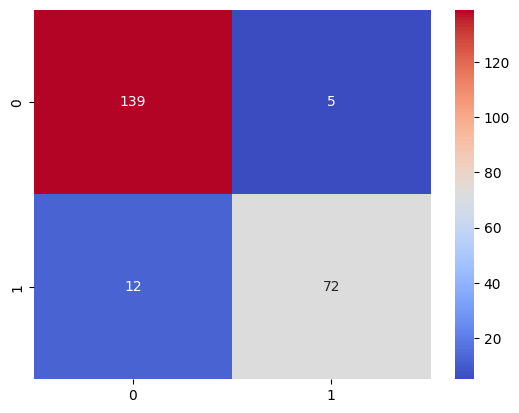

In [64]:
sns.heatmap(conf_mat,cmap='coolwarm',annot=True,fmt='d')
plt.show()

<Axes: >

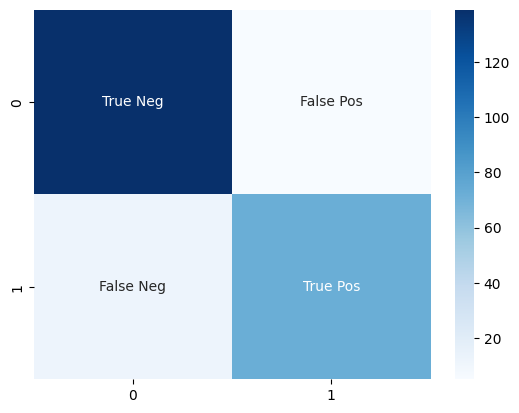

In [65]:
# Distribución de valores en confusion matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, fmt="", cmap='Blues')

In [70]:
# calcular metricas
print(metrics.classification_report(Y_test, Y_pred_test, target_names=label))

              precision    recall  f1-score   support

      benign       0.92      0.97      0.94       144
   malignant       0.94      0.86      0.89        84

    accuracy                           0.93       228
   macro avg       0.93      0.91      0.92       228
weighted avg       0.93      0.93      0.92       228



In [71]:
# Accuracy, Sensitivity, Specificity y Precision usando la confusion matrix.
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.925
Sensitvity  = 0.857
Specificity = 0.965
Precision   = 0.935


In [72]:
# Alternativa.
accuracy = metrics.accuracy_score(Y_test,Y_pred_test)                      # Alternative way to calculate the accuracy.
sensitivity = metrics.recall_score(Y_test,Y_pred_test)
precision = metrics.precision_score(Y_test,Y_pred_test)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.925
Sensitvity  = 0.857
Precision   = 0.935


#### Límite de corte (umbral):

In [73]:
# Ahora, prediga la probabilidad de Y = 1.
Y_pred_test_prob=LL.predict_proba(X_test)[:,1]

In [74]:
Y_pred_test_prob

array([8.21732895e-02, 1.16906774e-04, 4.03938009e-02, 2.10314491e-02,
       2.18681502e-03, 5.11399712e-03, 9.18992335e-01, 2.05230919e-03,
       1.00000000e+00, 9.99979969e-01, 9.99999999e-01, 2.82527044e-02,
       4.89605561e-03, 4.71767708e-02, 2.79628816e-03, 9.99999999e-01,
       3.05274092e-04, 2.86378360e-03, 8.82773887e-04, 9.99993591e-01,
       4.86604739e-03, 9.90298054e-01, 9.99999999e-01, 1.00000000e+00,
       9.99999993e-01, 3.43815152e-01, 9.96937205e-01, 2.46353731e-03,
       1.90452776e-03, 2.30212524e-03, 1.21009810e-02, 1.17736403e-03,
       9.98587099e-01, 1.45590810e-02, 8.27757675e-02, 1.53015622e-02,
       1.17329110e-02, 9.85956792e-01, 8.67731967e-01, 1.58251826e-03,
       9.99952832e-01, 1.26909128e-02, 1.00000000e+00, 1.97101866e-01,
       9.21527639e-02, 2.89060134e-03, 3.23176092e-03, 1.33740558e-01,
       1.00000000e+00, 9.59843884e-02, 5.18878324e-02, 9.18093124e-03,
       3.16796141e-03, 9.99999974e-01, 4.99489060e-01, 4.01483157e-04,
      

In [75]:
# Se puede cambiar el valor de corte a voluntad
cutoff = 0.7 # el valor de corte puede ser un valor entre 0 y 1.
Y_pred_test_val = (Y_pred_test_prob > cutoff).astype(int)
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test_val)
print(conf_mat)

[[143   1]
 [ 13  71]]


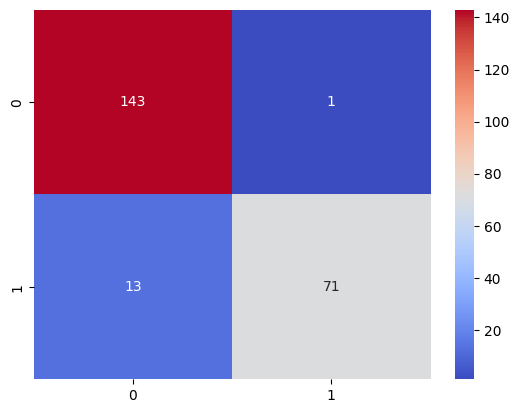

In [76]:
sns.heatmap(conf_mat,cmap='coolwarm',annot=True,fmt='d')
plt.show()

In [77]:
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.939
Sensitvity  = 0.845
Specificity = 0.993
Precision   = 0.986


### Curva ROC

In [78]:
# Initialize.
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []                                                   # True Positive Rate.
FPR = []                                                   # False Positive Rate.

In [79]:
# Populate the TP and FP lists.
for cutoff in cutoff_grid:
    Y_pred_test_val = (Y_pred_test_prob > cutoff).astype(int)
    conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test_val)
    sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    TPR.append(sensitivity)
    FPR.append(1-specificity)

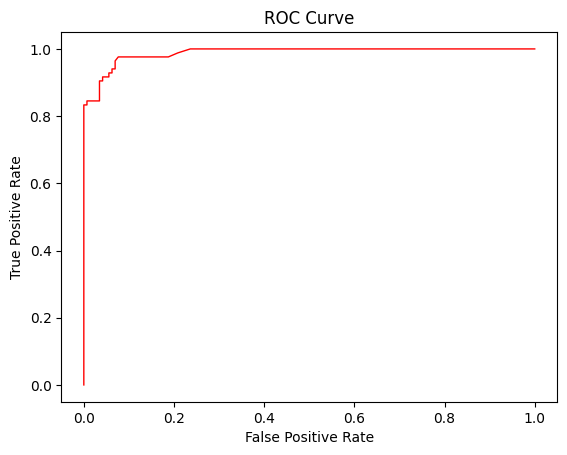

In [80]:
# Visualizar.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [81]:
# Calculate the TPR and FPR using a Scikit Learn function.
FPR, TPR, cutoffs = metrics.roc_curve(Y_test,Y_pred_test_prob,pos_label=1)      # positive label = 1.

In [82]:
print(FPR)
print(TPR)

[0.         0.         0.         0.00694444 0.00694444 0.03472222
 0.03472222 0.04166667 0.04166667 0.05555556 0.05555556 0.0625
 0.0625     0.06944444 0.06944444 0.1875     0.1875     0.22222222
 0.22222222 1.        ]
[0.         0.05952381 0.83333333 0.83333333 0.8452381  0.8452381
 0.9047619  0.9047619  0.91666667 0.91666667 0.92857143 0.92857143
 0.94047619 0.94047619 0.97619048 0.97619048 0.98809524 0.98809524
 1.         1.        ]


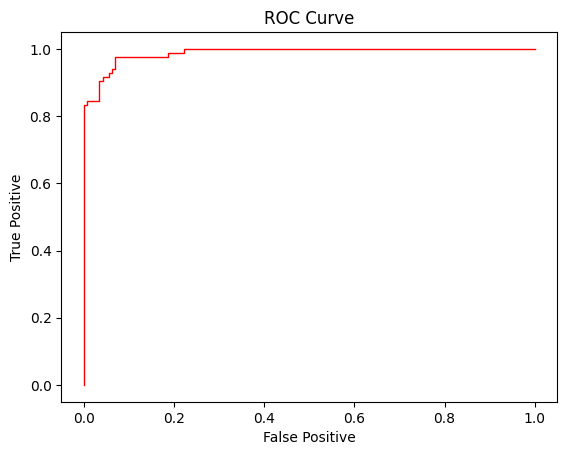

In [83]:
# Visualize.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

In [84]:
# AUC.
auc = metrics.roc_auc_score(Y_test,Y_pred_test_prob)
print('AUC  = {}'.format(np.round(auc,3)))

AUC  = 0.989
